<a href="https://colab.research.google.com/github/CodeHunterOfficial/TimeSeriesForecast_2024-2025/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0%205.%20%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20MLP/%D0%A2%D0%B5%D0%BC%D0%B0_5_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема 5. Прогнозирование временных рядов с помощью MLP


## Введение

Прогнозирование временных рядов — это процесс использования моделей для предсказания будущих значений на основе ранее наблюдаемых данных. Одним из методов, который часто используется для решения задач прогнозирования временных рядов, является многоуровневая перцептронная сеть (MLP — Multilayer Perceptron). В этой лекции мы подробно рассмотрим использование MLP в задачах прогнозирования временных рядов, обсудим теоретические основы, формулы, метрики и приведем числовые примеры.

## Основы MLP

### Архитектура MLP

MLP состоит из нескольких слоев: входного, одного или нескольких скрытых слоев и выходного слоя.

- **Входной слой**: Входной слой принимает данные. Если временной ряд имеет $n $ временных шагов, то входной слой будет иметь $n $ нейронов.
- **Скрытые слои**: Скрытые слои выполняют нелинейное преобразование данных. Каждый слой состоит из нескольких нейронов, которые соединены со всеми нейронами предыдущего слоя.
- **Выходной слой**: Выходной слой выдает результат. В задачах прогнозирования временных рядов выходной слой обычно состоит из одного нейрона, который предсказывает следующее значение временного ряда.

### Forward Pass

Процесс прямого распространения (Forward Pass) заключается в последовательном применении линейных преобразований и нелинейных функций активации к входным данным.

Для $k $-го нейрона в слое $l $ линейное преобразование можно записать как:

$$ z_k^{(l)} = \sum_{j=1}^{n_{l-1}} w_{kj}^{(l)} a_j^{(l-1)} + b_k^{(l)} $$

где:
- $z_k^{(l)} $ — взвешенная сумма входов нейрона $k $ в слое $l $
- $w_{kj}^{(l)} $ — вес соединения между нейроном $j $ в слое $l-1 $ и нейроном $k $ в слое $l $
- $a_j^{(l-1)} $ — выход нейрона $j $ в слое $l-1 $
- $b_k^{(l)} $ — смещение (bias) нейрона $k $ в слое $l $

Нелинейная функция активации применяется к $z_k^{(l)} $, чтобы получить активацию $a_k^{(l)} $:

$$ a_k^{(l)} = \phi(z_k^{(l)}) $$

### Функции активации

Функции активации добавляют нелинейность в модель. Наиболее часто используемые функции активации:

1. **ReLU (Rectified Linear Unit)**:
$$ \phi(z) = \max(0, z) $$

2. **Сигмоида**:
$$ \phi(z) = \frac{1}{1 + e^{-z}} $$

3. **Тангенс гиперболический (tanh)**:
$$ \phi(z) = \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}} $$

### Loss функции

Функция потерь измеряет разницу между предсказанными и реальными значениями. В задачах регрессии часто используется среднеквадратичная ошибка (MSE):

$$ \text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 $$

где:
- $y_i $ — истинное значение
- $\hat{y}_i $ — предсказанное значение
- $N $ — количество примеров в обучающей выборке

### Backpropagation

Процесс обратного распространения (Backpropagation) используется для обучения MLP путем минимизации функции потерь. Он состоит из двух шагов:

1. **Вычисление градиентов функции потерь по отношению к параметрам сети**:
    - Для выходного слоя:
    $$ \delta_k^{(L)} = \frac{\partial \mathcal{L}}{\partial a_k^{(L)}} \phi'(z_k^{(L)}) $$
    - Для скрытых слоев:
    $$ \delta_k^{(l)} = \left( \sum_{j=1}^{n_{l+1}} \delta_j^{(l+1)} w_{jk}^{(l+1)} \right) \phi'(z_k^{(l)}) $$

2. **Обновление параметров сети**:
    - Обновление весов:
    $$ w_{kj}^{(l)} = w_{kj}^{(l)} - \eta \frac{\partial \mathcal{L}}{\partial w_{kj}^{(l)}} $$
    - Обновление смещений:
    $$ b_k^{(l)} = b_k^{(l)} - \eta \frac{\partial \mathcal{L}}{\partial b_k^{(l)}} $$

где:
- $\eta $ — скорость обучения
- $\delta_k^{(l)} $ — ошибка нейрона $k $ в слое $l $
- $\mathcal{L} $ — функция потерь

### Прогнозирование

После обучения модели на тренировочных данных, можем использовать её для прогнозирования следующего значения временного ряда.

###Оценка модели

Для оценки качества модели можно использовать следующие метрики:

- **Среднеквадратичная ошибка (MSE)**:
$$ \text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 $$

- **Средняя абсолютная ошибка (MAE)**:
$$ \text{MAE} = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i| $$

- **Коэффициент детерминации (R^2)**:
$$ R^2 = 1 - \frac{\sum_{i=1}^N (y_i - \hat{y}_i)^2}{\sum_{i=1}^N (y_i - \bar{y})^2} $$

где $\bar{y} $ — среднее значение истинных значений.

## Конкретный числовой пример

Рассмотрим пример использования многоуровневого перцептрона (MLP) для прогнозирования временного ряда. Будем использовать искусственный временной ряд, чтобы продемонстрировать шаги обучения и прогнозирования с использованием MLP.

### Временной ряд

Допустим, у нас есть следующий временной ряд:

$$ \{1, 2, 3, 4, 5, 6, 7, 8, 9, 10\} $$

### Подготовка данных

Для прогнозирования следующего значения ряда будем использовать предыдущие три значения. Создадим обучающую выборку:

| Входы     | Выход |
|-----------|-------|
| [1, 2, 3] | 4     |
| [2, 3, 4] | 5     |
| [3, 4, 5] | 6     |
| [4, 5, 6] | 7     |
| [5, 6, 7] | 8     |
| [6, 7, 8] | 9     |
| [7, 8, 9] | 10    |

### Архитектура модели

Используем MLP с одним скрытым слоем, состоящим из 3 нейронов, функцией активации ReLU и одним нейроном в выходном слое.

### Инициализация весов и смещений

Начальные веса и смещения инициализируем случайными значениями:

- Входной слой: $\mathbf{x} = [x_1, x_2, x_3] $
- Скрытый слой:
  - Веса: $W^{(1)} = \begin{bmatrix} 0.2 & 0.4 & 0.1 \\ 0.3 & 0.7 & 0.2 \\ 0.5 & 0.6 & 0.8 \end{bmatrix} $
  - Смещения: $\mathbf{b}^{(1)} = [0.1, 0.1, 0.1] $
- Выходной слой:
  - Веса: $W^{(2)} = [0.3, 0.4, 0.5] $
  - Смещение: $b^{(2)} = 0.1 $

### Обучение модели: Forward Pass

#### Пример 1: Вход [1, 2, 3], Выход 4

1. **Скрытый слой**:
   $$
   \mathbf{z}^{(1)} = W^{(1)} \mathbf{x} + \mathbf{b}^{(1)}
   $$
   $$
   \mathbf{z}^{(1)} = \begin{bmatrix} 0.2 & 0.4 & 0.1 \\ 0.3 & 0.7 & 0.2 \\ 0.5 & 0.6 & 0.8 \end{bmatrix} \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} + \begin{bmatrix} 0.1 \\ 0.1 \\ 0.1 \end{bmatrix}
   $$
   $$
   \mathbf{z}^{(1)} = \begin{bmatrix} 0.2*1 + 0.4*2 + 0.1*3 + 0.1 \\ 0.3*1 + 0.7*2 + 0.2*3 + 0.1 \\ 0.5*1 + 0.6*2 + 0.8*3 + 0.1 \end{bmatrix}
   $$
   $$
   \mathbf{z}^{(1)} = \begin{bmatrix} 1.3 \\ 2.4 \\ 3.8 \end{bmatrix}
   $$

   Активация (ReLU):
   $$
   \mathbf{a}^{(1)} = \phi(\mathbf{z}^{(1)}) = \max(0, \mathbf{z}^{(1)}) = \begin{bmatrix} 1.3 \\ 2.4 \\ 3.8 \end{bmatrix}
   $$

2. **Выходной слой**:
   $$
   z^{(2)} = W^{(2)} \mathbf{a}^{(1)} + b^{(2)}
   $$
   $$
   z^{(2)} = [0.3, 0.4, 0.5] \begin{bmatrix} 1.3 \\ 2.4 \\ 3.8 \end{bmatrix} + 0.1
   $$
   $$
   z^{(2)} = 0.3*1.3 + 0.4*2.4 + 0.5*3.8 + 0.1
   $$
   $$
   z^{(2)} = 0.39 + 0.96 + 1.9 + 0.1 = 3.35
   $$

   Предсказанное значение:
   $$
   \hat{y} = z^{(2)} = 3.35
   $$

### Обучение модели: Backpropagation

1. **Функция потерь** (Mean Squared Error):
   $$
   \mathcal{L} = \frac{1}{2} (y - \hat{y})^2 = \frac{1}{2} (4 - 3.35)^2 = \frac{1}{2} (0.65)^2 = 0.21125
   $$

2. **Обратное распространение ошибки**:

   - Для выходного слоя:
 $$
  \delta^{(2)} = \hat{y} - y = 3.35 - 4 = -0.65
 $$

     Градиенты:
$$
\frac{\partial \mathcal{L}}{\partial W^{(2)}} = \delta^{(2)} \mathbf{a}^{(1)} = -0.65 \begin{bmatrix} 1.3 \\ 2.4 \\ 3.8 \end{bmatrix} = \begin{bmatrix} -0.845 \\ -1.56 \\ -2.47 \end{bmatrix}
$$
$$
\frac{\partial \mathcal{L}}{\partial b^{(2)}} = \delta^{(2)} = -0.65
$$

   - Для скрытого слоя:
$$
\delta^{(1)} = (W^{(2)})^T \delta^{(2)} \cdot \phi'(z^{(1)})
$$
Так как функция активации ReLU, производная $\phi'(z^{(1)}) = 1$ для положительных $z$:
$$
\delta^{(1)} = \begin{bmatrix} 0.3 \\ 0.4 \\ 0.5 \end{bmatrix} (-0.65) = \begin{bmatrix} -0.195 \\ -0.26 \\ -0.325 \end{bmatrix}
$$

     Градиенты:
$$
\frac{\partial \mathcal{L}}{\partial W^{(1)}} = \delta^{(1)} \mathbf{x}^T = \begin{bmatrix} -0.195 \\ -0.26 \\ -0.325 \end{bmatrix} \begin{bmatrix} 1 & 2 & 3 \end{bmatrix} = \begin{bmatrix} -0.195 & -0.39 & -0.585 \\ -0.26 & -0.52 & -0.78 \\ -0.325 & -0.65 & -0.975 \end{bmatrix}
$$

$$
\frac{\partial \mathcal{L}}{\partial b^{(1)}} = \delta^{(1)} = \begin{bmatrix} -0.195 \\ -0.26 \\ -0.325 \end{bmatrix}
$$

3. **Обновление параметров** (с использованием скорости обучения $\eta = 0.01$):

   - Выходной слой:
$$
W^{(2)} = W^{(2)} - \eta \frac{\partial \mathcal{L}}{\partial W^{(2)}} = \begin{bmatrix} 0.3 \\ 0.4 \\ 0.5 \end{bmatrix} - 0.01 \begin{bmatrix} -0.845 \\ -1.56 \\ -2.47 \end{bmatrix} = \begin{bmatrix} 0.30845 \\ 0.4156 \\ 0.5247 \end{bmatrix}
$$
$$
b^{(2)} = b^{(2)} - \eta \frac{\partial \mathcal{L}}{\partial b^{(2)}} = 0.1 - 0.01 (-0.65) = 0.1065
 $$

   - Скрытый слой:
$$
W^{(1)} = W^{(1)} - \eta \frac{\partial \mathcal{L}}{\partial W^{(1)}} = \begin{bmatrix} 0.2 & 0.4 & 0.1 \\ 0.3 & 0.7 & 0.2 \\ 0.5 & 0.6 & 0.8 \end{bmatrix} - 0.01 \begin{bmatrix} -0.195 & -0.39 & -0.585 \\ -0.26 & -0.52 & -0.78 \\ -0.325 & -0.65 & -0.975 \end{bmatrix}
$$
$$
W^{(1)} = \begin{bmatrix} 0.20195 & 0.4039 & 0.10585 \\ 0.3026 & 0.7052 & 0.2078 \\ 0.50325 & 0.6065 & 0.80975 \end{bmatrix}
$$
$$
b^{(1)} = b^{(1)} - \eta \frac{\partial \mathcal{L}}{\partial b^{(1)}} = \begin{bmatrix} 0.1 \\ 0.1 \\ 0.1 \end{bmatrix} - 0.01 \begin{bmatrix} -0.195 \\ -0.26 \\ -0.325 \end{bmatrix} = \begin{bmatrix} 0.10195 \\ 0.1026 \\ 0.10325 \end{bmatrix}
$$

Таким образом, после одного шага обучения обновленные веса и смещения будут:

- $W^{(1)} = \begin{bmatrix} 0.20195 & 0.4039 & 0.10585 \\ 0.3026 & 0.7052 & 0.2078 \\ 0.50325 & 0.6065 & 0.80975 \end{bmatrix} $
- $\mathbf{b}^{(1)} = [0.10195, 0.1026, 0.10325] $
- $W^{(2)} = [0.30845, 0.4156, 0.5247] $
- $b^{(2)} = 0.1065 $

### Прогнозирование

ДLя тестового примера, скажем, [8, 9, 10], мы можем использовать обученную модеLь дLя прогнозирования:

1. **Скрытый слой**:
$$
\mathbf{z}^{(1)} = W^{(1)} \mathbf{x} + \mathbf{b}^{(1)}
$$
$$
\mathbf{z}^{(1)} = \begin{bmatrix} 0.20195 & 0.4039 & 0.10585 \\ 0.3026 & 0.7052 & 0.2078 \\ 0.50325 & 0.6065 & 0.80975 \end{bmatrix} \begin{bmatrix} 8 \\ 9 \\ 10 \end{bmatrix} + \begin{bmatrix} 0.10195 \\ 0.1026 \\ 0.10325 \end{bmatrix}
$$
$$
\mathbf{z}^{(1)} = \begin{bmatrix} 6.095 \\ 12.3514 \\ 19.17075 \end{bmatrix}
$$

   Активация (ReLU):
$$
\mathbf{a}^{(1)} = \phi(\mathbf{z}^{(1)}) = \max(0, \mathbf{z}^{(1)}) = \begin{bmatrix} 6.095 \\ 12.3514 \\ 19.17075 \end{bmatrix}
$$

2. **Выходной слой**:
$$
z^{(2)} = W^{(2)} \mathbf{a}^{(1)} + b^{(2)}
$$
$$
z^{(2)} = [0.30845, 0.4156, 0.5247] \begin{bmatrix} 6.095 \\ 12.3514 \\ 19.17075 \end{bmatrix} + 0.1065
$$
$$
z^{(2)} = 0.30845*6.095 + 0.4156*12.3514 + 0.5247*19.17075 + 0.1065
$$
$$
z^{(2)} = 1.87948 + 5.13595 + 10.0595 + 0.1065 = 17.18143
$$

   Предсказанное значение:
$$
   \hat{y} = z^{(2)} = 17.18143
$$

Этот числовой пример демонстрирует шаги обучения и прогнозирования с использованием MLP для временного ряда. В реальных задачах потребуется больше итераций обучения и более сложные модели для достижения точных прогнозов.

## Заключение

Многоуровневые перцептроны (MLP) являются мощным инструментом для прогнозирования временных рядов. Основные этапы включают в себя создание архитектуры модели, обучение с использованием алгоритма обратного распространения и оценку качества модели с помощью различных метрик. Приведённый пример иллюстрирует основные шаги и концепции, которые могут быть использованы для успешного применения MLP в задачах прогнозирования временных рядов.




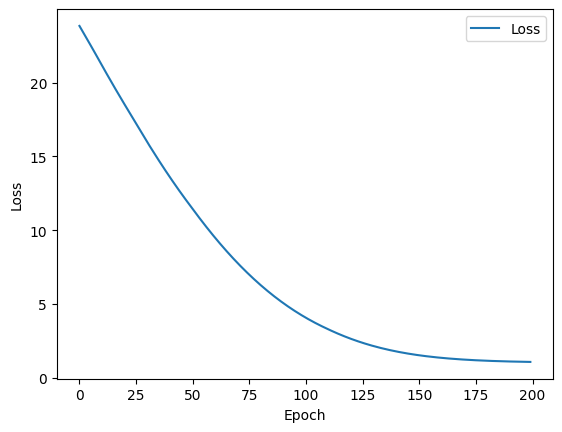

Next value for input [8, 9, 10] is 12.234274864196777


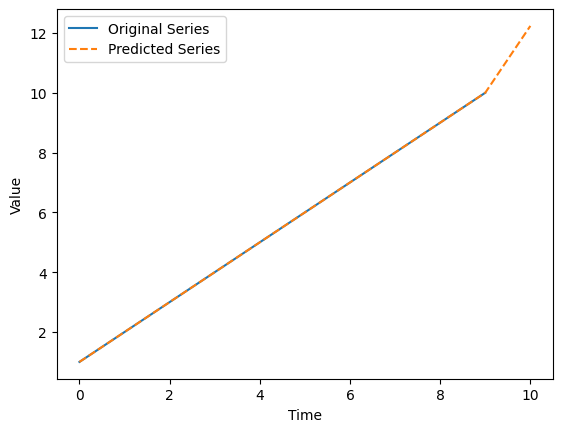

Mean Squared Error (MSE): 1.5684792129760083
Mean Absolute Error (MAE): 1.036522537469864
R²: 0.6502346005907159


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Генерация временного ряда
time_series = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Подготовка данных для обучения
def create_dataset(series, n_steps):
    X, y = [], []
    for i in range(len(series) - n_steps):
        X.append(series[i:i+n_steps])
        y.append(series[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 3
X, y = create_dataset(time_series, n_steps)

# Определение модели
model = Sequential([
    Dense(3, activation='relu', input_shape=(n_steps,)),
    Dense(1)
])

# Компиляция модели
model.compile(optimizer='adam', loss='mse')

# Обучение модели
history = model.fit(X, y, epochs=200, verbose=0)

# Визуализация процесса обучения
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Прогнозирование
def predict_next(model, input_data, n_steps):
    input_data = np.array(input_data).reshape((1, n_steps))
    return model.predict(input_data, verbose=0)[0][0]

# Прогнозирование для всего временного ряда
predicted_values = []
for i in range(len(X)):
    predicted_values.append(predict_next(model, X[i], n_steps))

# Добавим предсказание для последнего шага
test_input = [8, 9, 10]
predicted_value = predict_next(model, test_input, n_steps)
print(f'Next value for input {test_input} is {predicted_value}')
predicted_values.append(predicted_value)

# Визуализация прогноза
predicted_series = list(time_series)
predicted_series.append(predicted_value)

plt.plot(range(len(time_series)), time_series, label='Original Series')
plt.plot(range(len(predicted_series)), predicted_series, label='Predicted Series', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Расчет метрик
y_true = np.append(y, 10)  # Истинные значения, включая последнее значение 10
y_pred = np.array(predicted_values)  # Предсказанные значения

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R²: {r2}')